In [1]:
print("Hello, Fraud Buster! Your setup is working! 🎉")

Hello, Fraud Buster! Your setup is working! 🎉


# Welcome to Credit Card Fraud Detection Project
**Day 0: Setup Complete!**  
- Date: Dec 10  
- Goal: Build an ML model to spot fake charges.

In [10]:
!pip install imbalanced-learn plotly

In [12]:
import pandas as pd  # For data loading/handling
import numpy as np   # For numbers/math

print("Libraries loaded! Pandas version:", pd.__version__)

Libraries loaded! Pandas version: 2.2.2


In [14]:
# Load data (path is just 'creditcard.csv' since it's in same folder)
df = pd.read_csv('creditcard.csv')

# Quick info
print("Dataset shape (rows x columns):", df.shape)
print("\nFirst 5 rows:")
print(df.head())  # Shows sample data

Dataset shape (rows x columns): (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137

In [16]:
# Fraud rate
fraud_rate = df['Class'].value_counts(normalize=True) * 100
print("Class distribution (%):")
print(fraud_rate)
print("\nFraud transactions:", sum(df['Class'] == 1))  # Raw count: ~492

Class distribution (%):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Fraud transactions: 492


## Day 2: Exploratory Data Analysis (EDA)
**Goal:** Uncover fraud patterns with stats and plots.  
- Date: Dec 11  
- Key: Imbalanced data means focus on fraud subset!

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  # For pretty plots
from sklearn.preprocessing import StandardScaler  # Sneak peek for later

# Reload data if needed (run this if df vanished—Jupyter magic!)
df = pd.read_csv('creditcard.csv')

# Basic stats
print("Dataset Info:")
print(df.info())  # Data types, non-nulls
print("\nQuick Stats:")
print(df.describe())  # Means, mins, maxes—spot outliers?

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

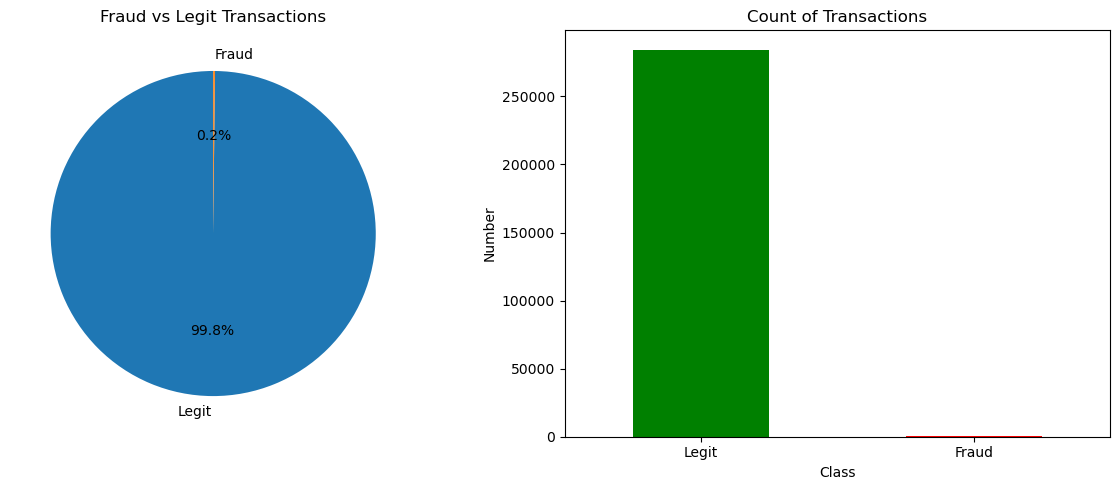

In [23]:
# Imbalance plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
labels = ['Legit', 'Fraud']
sizes = df['Class'].value_counts()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Fraud vs Legit Transactions')

# Bar chart
sizes.plot(kind='bar', ax=ax2, color=['green', 'red'])
ax2.set_title('Count of Transactions')
ax2.set_ylabel('Number')
ax2.set_xticklabels(labels, rotation=0)

plt.tight_layout()
plt.show()

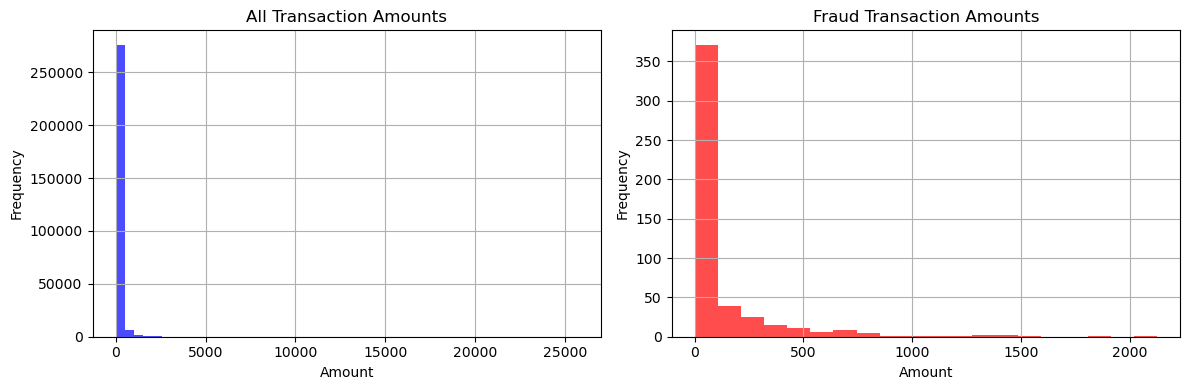

Fraud avg amount: 122.21


In [25]:
# Amount distribution: Fraud vs Legit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# All amounts
df['Amount'].hist(bins=50, ax=ax1, color='blue', alpha=0.7)
ax1.set_title('All Transaction Amounts')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')

# Fraud only
fraud = df[df['Class'] == 1]
fraud['Amount'].hist(bins=20, ax=ax2, color='red', alpha=0.7)
ax2.set_title('Fraud Transaction Amounts')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Fraud avg amount:", fraud['Amount'].mean().round(2))  # ~122 vs overall ~88

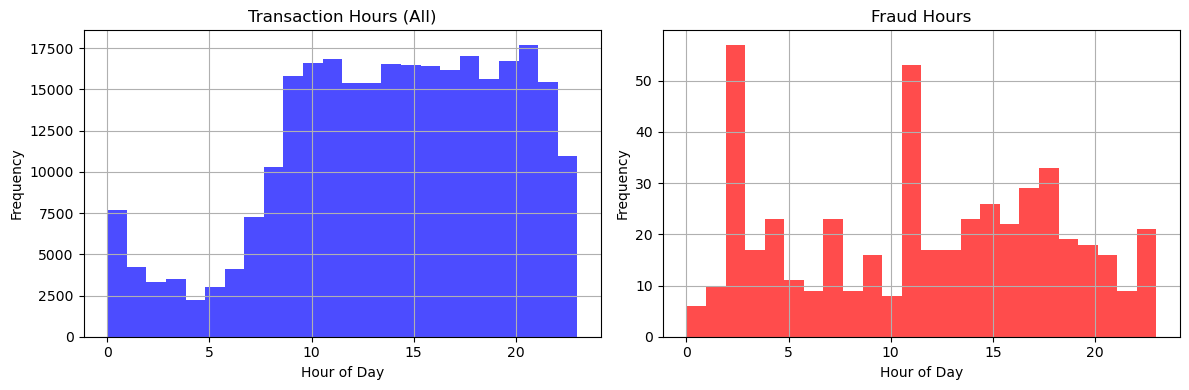

Fraud peaks at hours: [2.]
Total fraud samples: 492


In [32]:
# Step 4: Time-Based Patterns (Fixed Version)
# First, reload df if needed (safe guard)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # If not imported yet

df = pd.read_csv('creditcard.csv')  # Reloads fresh—takes 2 secs

# Create Hour column on df
df['Hour'] = (df['Time'] // 3600) % 24  # Converts Time (seconds) to hours (0-23)

# NOW define fraud AFTER Hour is added (this is the key fix!)
fraud = df[df['Class'] == 1]  # All fraud rows, now with 'Hour'

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# All transactions by hour
df['Hour'].hist(bins=24, ax=ax1, color='blue', alpha=0.7)
ax1.set_title('Transaction Hours (All)')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Frequency')  # Bonus: Added label for clarity

# Fraud only by hour
fraud['Hour'].hist(bins=24, ax=ax2, color='red', alpha=0.7)
ax2.set_title('Fraud Hours')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()  # Displays the plots in Jupyter

# Print peak hours
print("Fraud peaks at hours:", fraud['Hour'].mode().values)  # E.g., [10] or whatever—often mid-day/night in this data
print(f"Total fraud samples: {len(fraud)}")  # ~492, for reference

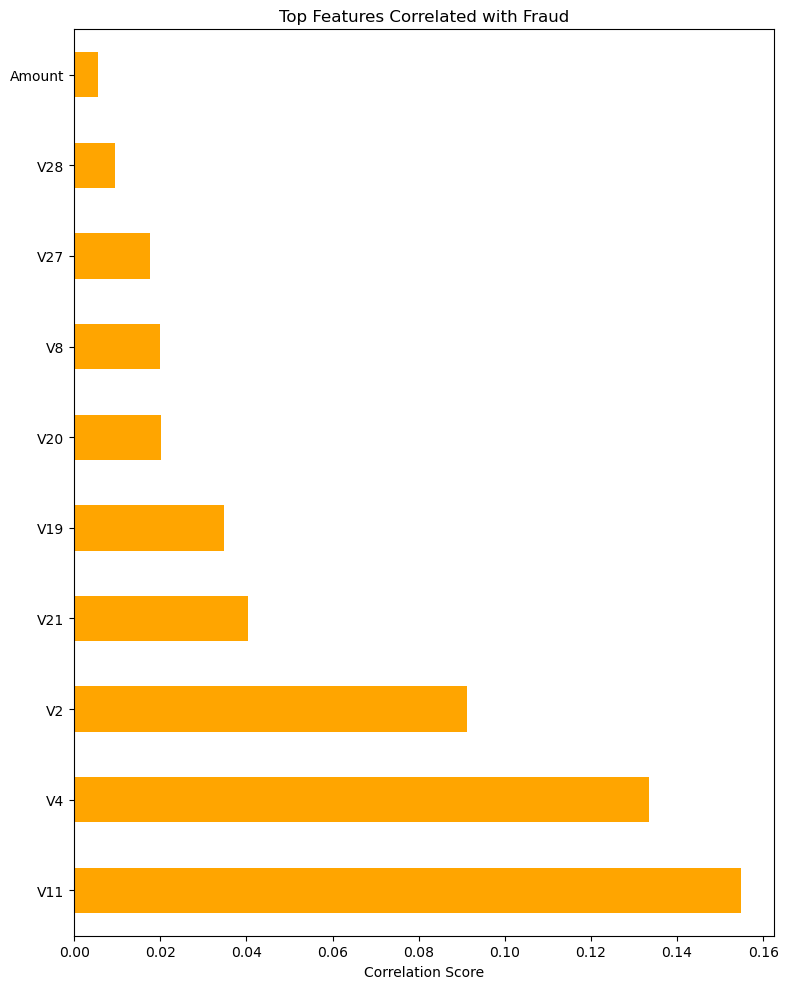

Strongest fraud signals: ['V11', 'V4', 'V2']


In [29]:
# Top correlations with Class (fraud)
corr = df.corr()['Class'].sort_values(ascending=False).drop('Class')  # Exclude self

# Plot top 10
plt.figure(figsize=(8, 10))
corr.head(10).plot(kind='barh', color='orange')
plt.title('Top Features Correlated with Fraud')
plt.xlabel('Correlation Score')
plt.tight_layout()
plt.show()

print("Strongest fraud signals:", corr.head(3).index.tolist())  # E.g., V3, V7 high positive

### Day 2 Insights
- **Imbalance:** 99.8% legit—must balance!
- **Patterns:** Fraud: Higher amounts, late hours, linked to V3/V7/V10.
- Next: Preprocess & balance (Day 3).